# McKinney Chapter 10 - Practice (All Sections)

## Announcements

## Practice

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
%config InlineBackend.figure_format = 'retina'
%precision 4
pd.options.display.float_format = '{:.4f}'.format

In [3]:
import yfinance as yf
import pandas_datareader as pdr
import requests_cache
session = requests_cache.CachedSession()

### Replicate the following `.pivot_table()` output with `.groupby()`

In [4]:
ind = (
    yf.download(
        tickers='^GSPC ^DJI ^IXIC ^FTSE ^N225 ^HSI',
        progress=False
    )
    .rename_axis(columns=['Variable', 'Index'])
    .stack()
)

ind.head()

,Variable,Adj Close,Close,High,Low,Open,Volume
Date,Index,,,,,,
1927-12-30 05:00:00+00:00,^GSPC,17.6600,17.6600,17.6600,17.6600,17.6600,0.0000
1928-01-03 05:00:00+00:00,^GSPC,17.7600,17.7600,17.7600,17.7600,17.7600,0.0000
1928-01-04 05:00:00+00:00,^GSPC,17.7200,17.7200,17.7200,17.7200,17.7200,0.0000
1928-01-05 05:00:00+00:00,^GSPC,17.5500,17.5500,17.5500,17.5500,17.5500,0.0000
1928-01-06 05:00:00+00:00,^GSPC,17.6600,17.6600,17.6600,17.6600,17.6600,0.0000


In [5]:
(
    ind
    .loc['2015':]
    .reset_index()
    .pivot_table(
        values='Close',
        index=pd.Grouper(key='Date', freq='A'),
        columns='Index',
        aggfunc=['min', 'max']
    )
)

min                                 \
Index                           ^DJI     ^FTSE     ^GSPC       ^HSI   
Date                                                                  
2015-12-31 00:00:00+00:00 15666.4404 5874.1001 1867.6100 20556.5996   
2016-12-31 00:00:00+00:00 15660.1797 5537.0000 1829.0800 18319.5801   
2017-12-31 00:00:00+00:00 19732.4004 7099.2002 2257.8301 22134.4707   
2018-12-31 00:00:00+00:00 21792.1992 6584.7002 2351.1001 24585.5293   
2019-12-31 00:00:00+00:00 22686.2207 6692.7002 2447.8899 25064.3594   
2020-12-31 00:00:00+00:00 18591.9297 4993.8999 2237.3999 21696.1309   
2021-12-31 00:00:00+00:00 29982.6191 6407.5000 3700.6499 22744.8594   
2022-12-31 00:00:00+00:00 28725.5098 6826.2002 3577.0300 14687.0195   
2023-12-31 00:00:00+00:00 32656.6992 7554.1001 3808.1001 19785.9395   

                                                       max            \
Index                          ^IXIC      ^N225       ^DJI     ^FTSE   
Date                                                                   
2015-12-31 00:00:00+00:00  4506.4902 16795.9609 18312.3906 7104.0000   
2016-12-31 00:00:00+00:00  4266.8398 14952.0195 19974.6191 7142.7998   
2017-12-31 00:00:00+00:00  5429.0801 18335.6309 24837.5098 7687.7998   
2018-12-31 00:00:00+00:00  6192.9199 19155.7402 26828.3906 7877.5000   
2019-12-31 00:00:00+00:00  6463.5000 19561.9609 28645.2598 7686.6001   
2020-12-31 00:00:00+00:00  6860.6699 16552.8301 30606.4805 7674.6001   
2021-12-31 00:00:00+00:00 12609.1602 27013.2500 36488.6289 7420.7002   
2022-12-31 00:00:00+00:00 10213.2900 24717.5293 36799.6484 7672.3999   
2023-12-31 00:00:00+00:00 10305.2402 25716.8594 34302.6094 8014.2998   

                                                                      
Index                         ^GSPC       ^HSI      ^IXIC      ^N225  
Date                                                                  
2015-12-31 00:00:00+00:00 2130.8201 28442.7500  5218.8599 20868.0293  
2016-12-31 00:00:00+00:00 2271.7200 24099.6992  5487.4399 19494.5293  
2017-12-31 00:00:00+00:00 2690.1599 30003.4902  6994.7598 22939.1797  
2018-12-31 00:00:00+00:00 2930.7500 33154.1211  8109.6899 24270.6191  
2019-12-31 00:00:00+00:00 3240.0200 30157.4902  9022.3896 24066.1191  
2020-12-31 00:00:00+00:00 3756.0701 29056.4199 12899.4199 27568.1504  
2021-12-31 00:00:00+00:00 4793.0601 31084.9395 16057.4404 30670.0996  
2022-12-31 00:00:00+00:00 4796.5601 24965.5508 15832.7998 29332.1602  
2023-12-31 00:00:00+00:00 4179.7598 22688.9004 12200.8203 27696.4395

Here is the `.groupby()` solution!

In [6]:
(
    ind
    .loc['2015':, ['Close']]
    .reset_index('Index')
    .groupby([pd.Grouper(freq='A'), 'Index'])
    .agg(['min', 'max'])
    ['Close']
    .unstack()
)

min                                 \
Index                           ^DJI     ^FTSE     ^GSPC       ^HSI   
Date                                                                  
2015-12-31 00:00:00+00:00 15666.4404 5874.1001 1867.6100 20556.5996   
2016-12-31 00:00:00+00:00 15660.1797 5537.0000 1829.0800 18319.5801   
2017-12-31 00:00:00+00:00 19732.4004 7099.2002 2257.8301 22134.4707   
2018-12-31 00:00:00+00:00 21792.1992 6584.7002 2351.1001 24585.5293   
2019-12-31 00:00:00+00:00 22686.2207 6692.7002 2447.8899 25064.3594   
2020-12-31 00:00:00+00:00 18591.9297 4993.8999 2237.3999 21696.1309   
2021-12-31 00:00:00+00:00 29982.6191 6407.5000 3700.6499 22744.8594   
2022-12-31 00:00:00+00:00 28725.5098 6826.2002 3577.0300 14687.0195   
2023-12-31 00:00:00+00:00 32656.6992 7554.1001 3808.1001 19785.9395   

                                                       max            \
Index                          ^IXIC      ^N225       ^DJI     ^FTSE   
Date                                                                   
2015-12-31 00:00:00+00:00  4506.4902 16795.9609 18312.3906 7104.0000   
2016-12-31 00:00:00+00:00  4266.8398 14952.0195 19974.6191 7142.7998   
2017-12-31 00:00:00+00:00  5429.0801 18335.6309 24837.5098 7687.7998   
2018-12-31 00:00:00+00:00  6192.9199 19155.7402 26828.3906 7877.5000   
2019-12-31 00:00:00+00:00  6463.5000 19561.9609 28645.2598 7686.6001   
2020-12-31 00:00:00+00:00  6860.6699 16552.8301 30606.4805 7674.6001   
2021-12-31 00:00:00+00:00 12609.1602 27013.2500 36488.6289 7420.7002   
2022-12-31 00:00:00+00:00 10213.2900 24717.5293 36799.6484 7672.3999   
2023-12-31 00:00:00+00:00 10305.2402 25716.8594 34302.6094 8014.2998   

                                                                      
Index                         ^GSPC       ^HSI      ^IXIC      ^N225  
Date                                                                  
2015-12-31 00:00:00+00:00 2130.8201 28442.7500  5218.8599 20868.0293  
2016-12-31 00:00:00+00:00 2271.7200 24099.6992  5487.4399 19494.5293  
2017-12-31 00:00:00+00:00 2690.1599 30003.4902  6994.7598 22939.1797  
2018-12-31 00:00:00+00:00 2930.7500 33154.1211  8109.6899 24270.6191  
2019-12-31 00:00:00+00:00 3240.0200 30157.4902  9022.3896 24066.1191  
2020-12-31 00:00:00+00:00 3756.0701 29056.4199 12899.4199 27568.1504  
2021-12-31 00:00:00+00:00 4793.0601 31084.9395 16057.4404 30670.0996  
2022-12-31 00:00:00+00:00 4796.5601 24965.5508 15832.7998 29332.1602  
2023-12-31 00:00:00+00:00 4179.7598 22688.9004 12200.8203 27696.4395

### Calulate the mean and standard deviation of returns by ticker for the MATANA (MSFT, AAPL, TSLA, AMZN, NVDA, and GOOG) stocks

Consider only dates with complete returns data.
Try this calculation with wide and long data frames, and confirm your results are the same.

In [7]:
matana = (
    yf.Tickers(tickers='MSFT AAPL TSLA AMZN NVDA GOOG', session=session)
    .history(period='max', auto_adjust=False, progress=False)
    .rename_axis(columns=['Variable', 'Ticker'])
)

In [8]:
returns = matana['Adj Close'].pct_change().dropna()

In [9]:
returns.agg(['mean', 'std'])

Ticker,AAPL,AMZN,GOOG,MSFT,NVDA,TSLA
mean,0.0011,0.0011,0.0008,0.0010,0.0018,0.0022
std,0.0180,0.0208,0.0172,0.0165,0.0282,0.0362


In [10]:
returns.stack().groupby('Ticker').agg(['mean', 'std']).T

Ticker,AAPL,AMZN,GOOG,MSFT,NVDA,TSLA
mean,0.0011,0.0011,0.0008,0.0010,0.0018,0.0022
std,0.0180,0.0208,0.0172,0.0165,0.0282,0.0362


In [11]:
np.allclose(
    returns.agg(['mean', 'std']),
    returns.stack().groupby('Ticker').agg(['mean', 'std']).T    
)

True

### Calculate the mean and standard deviation of returns and the maximum of closing prices by ticker for the MATANA stocks

Again, consider only dates with complete returns data.
Try this calculation with wide and long data frames, and confirm your results are the same.

In [12]:
_ = pd.MultiIndex.from_product([['Returns'], matana['Adj Close']])
matana[_] = matana['Adj Close'].pct_change()

In [13]:
(
    matana
    .loc[returns.index]
    .stack()
    .groupby('Ticker')
    .agg({'Returns': ['mean', 'std'], 'Close': ['max']})
)

Variable Returns           Close
            mean    std      max
Ticker                          
AAPL      0.0011 0.0180 182.0100
AMZN      0.0011 0.0208 186.5705
GOOG      0.0008 0.0172 150.7090
MSFT      0.0010 0.0165 343.1100
NVDA      0.0018 0.0282 333.7600
TSLA      0.0022 0.0362 409.9700

### Calculate monthly means and volatilities for SPY and GOOG returns

In [14]:
spy_goog = (
    yf.Tickers(tickers='SPY GOOG', session=session)
    .history(period='max', auto_adjust=False, progress=False)
    .rename_axis(columns=['Variable', 'Ticker'])
)

spy_goog.head()

Variable                  Adj Close         Capital Gains Close          \
Ticker                         GOOG     SPY           SPY  GOOG     SPY   
Date                                                                      
1993-01-29 00:00:00-05:00       NaN 25.2182        0.0000   NaN 43.9375   
1993-02-01 00:00:00-05:00       NaN 25.3976        0.0000   NaN 44.2500   
1993-02-02 00:00:00-05:00       NaN 25.4514        0.0000   NaN 44.3438   
1993-02-03 00:00:00-05:00       NaN 25.7204        0.0000   NaN 44.8125   
1993-02-04 00:00:00-05:00       NaN 25.8281        0.0000   NaN 45.0000   

Variable                  Dividends        High          Low         Open  \
Ticker                         GOOG    SPY GOOG     SPY GOOG     SPY GOOG   
Date                                                                        
1993-01-29 00:00:00-05:00       NaN 0.0000  NaN 43.9688  NaN 43.7500  NaN   
1993-02-01 00:00:00-05:00       NaN 0.0000  NaN 44.2500  NaN 43.9688  NaN   
1993-02-02 00:00:00-05:00       NaN 0.0000  NaN 44.3750  NaN 44.1250  NaN   
1993-02-03 00:00:00-05:00       NaN 0.0000  NaN 44.8438  NaN 44.3750  NaN   
1993-02-04 00:00:00-05:00       NaN 0.0000  NaN 45.0938  NaN 44.4688  NaN   

Variable                          Stock Splits        Volume           
Ticker                        SPY         GOOG    SPY   GOOG      SPY  
Date                                                                   
1993-01-29 00:00:00-05:00 43.9688          NaN 0.0000    NaN  1003200  
1993-02-01 00:00:00-05:00 43.9688          NaN 0.0000    NaN   480500  
1993-02-02 00:00:00-05:00 44.2188          NaN 0.0000    NaN   201300  
1993-02-03 00:00:00-05:00 44.4062          NaN 0.0000    NaN   529400  
1993-02-04 00:00:00-05:00 44.9688          NaN 0.0000    NaN   531500

In [15]:
spy_goog_m = (
    spy_goog
    .loc['1993-02':'2023-01', 'Adj Close']
    .pct_change()
    .groupby(pd.Grouper(freq='M'))
    .agg(['mean', 'std'])
)

spy_goog_m

Ticker                       GOOG            SPY       
                             mean    std    mean    std
Date                                                   
1993-02-28 00:00:00-05:00     NaN    NaN  0.0002 0.0081
1993-03-31 00:00:00-05:00     NaN    NaN  0.0010 0.0071
1993-04-30 00:00:00-04:00     NaN    NaN -0.0012 0.0074
1993-05-31 00:00:00-04:00     NaN    NaN  0.0014 0.0071
1993-06-30 00:00:00-04:00     NaN    NaN  0.0002 0.0060
...                           ...    ...     ...    ...
2022-09-30 00:00:00-04:00 -0.0058 0.0198 -0.0045 0.0151
2022-10-31 00:00:00-04:00 -0.0003 0.0300  0.0039 0.0176
2022-11-30 00:00:00-05:00  0.0038 0.0316  0.0027 0.0176
2022-12-31 00:00:00-05:00 -0.0062 0.0173 -0.0028 0.0113
2023-01-31 00:00:00-05:00  0.0061 0.0216  0.0031 0.0105

[360 rows x 4 columns]

### Plot the monthly means and volatilities from the previous exercise

Here is a first go!

array([<AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>,
       <AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>],
      dtype=object)

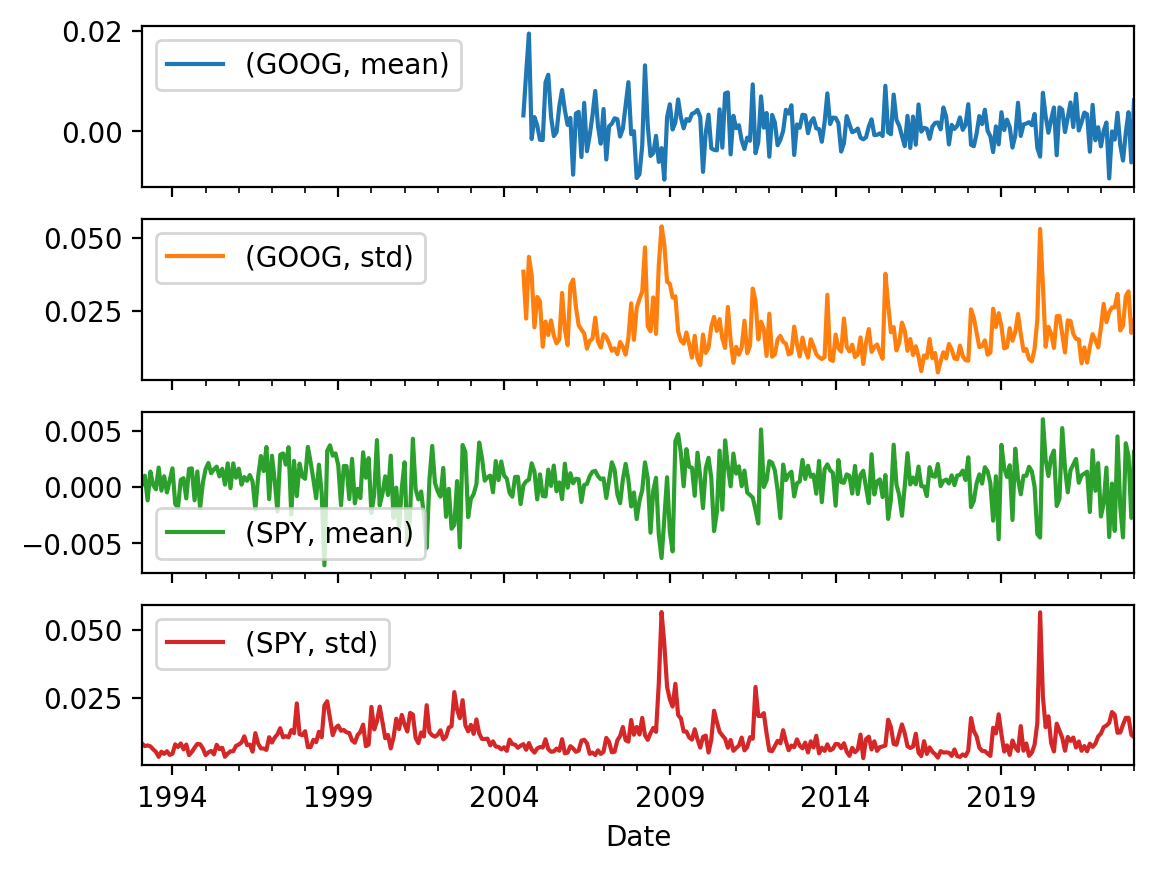

In [16]:
spy_goog_m.plot(subplots=True)

We can use `plt.subplots()` to better organize these plots.
Here `.plt.subplots()` creates a tuple of empty axes and assign it to `ax`.
Then we can use the `ax=` argument to assign each plot to each axes.
I suggest ou pick up these tricks as you go instead of trying to read and memorize the matplotlib manual before you have a very specific task as hand.

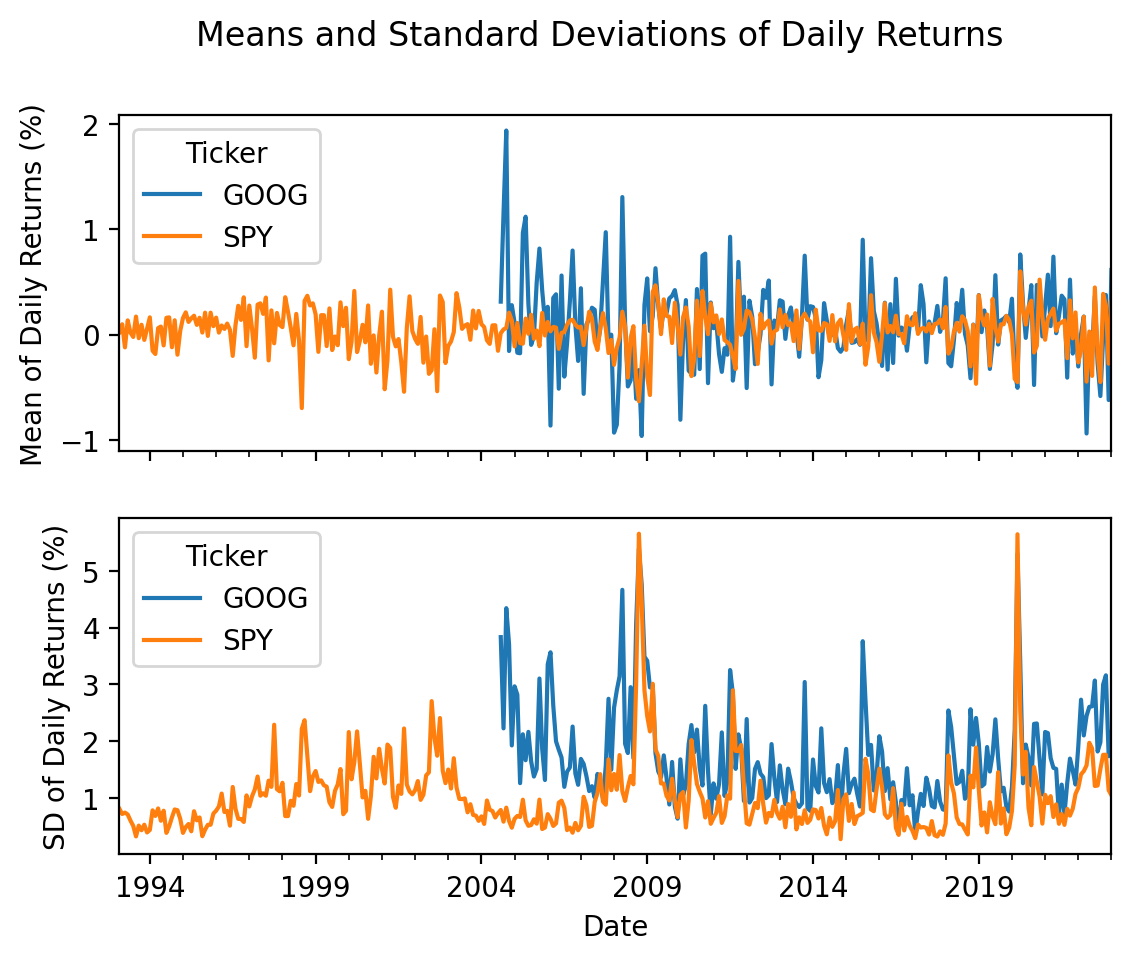

In [17]:
fig, ax = plt.subplots(2, 1, sharex=True)
spy_goog_m.swaplevel(axis=1)['mean'].mul(100).plot(ax=ax[0], ylabel='Mean of Daily Returns (%)')
spy_goog_m.swaplevel(axis=1)['std'].mul(100).plot(ax=ax[1], ylabel='SD of Daily Returns (%)')
plt.suptitle('Means and Standard Deviations of Daily Returns')
plt.show()

### Assign the Dow Jones stocks to five portfolios based on their monthly volatility

First, we need to download Dow Jones stock data and calculate daily returns.
Use data from 2020 through today.

In [18]:
wiki = pd.read_html('https://en.wikipedia.org/wiki/Dow_Jones_Industrial_Average')

In [19]:
dj = (
    yf.Tickers(tickers=wiki[1]['Symbol'].to_list(), session=session)
    .history(period='max', auto_adjust=False, progress=False)
    .rename_axis(columns=['Variable', 'Ticker'])
)

Here I add daily returns.

In [20]:
_ = pd.MultiIndex.from_product([['Returns'], dj['Adj Close']])
dj[_] = dj['Adj Close'].pct_change()

Here I add the monthly volatility to all the days in each month for each ticker.

In [21]:
_ = pd.MultiIndex.from_product([['Volatility'], dj['Returns']])
dj[_] = dj['Returns'].groupby(pd.Grouper(freq='M')).transform('std')

Here I assign stocks to portfolios based on their volatility.

In [22]:
1 + pd.qcut(np.arange(10), q=5, labels=False)

array([1, 1, 2, 2, 3, 3, 4, 4, 5, 5], dtype=int64)

In [23]:
_ = pd.MultiIndex.from_product([['Portfolio'], dj['Volatility']])
dj[_] = dj['Volatility'].apply(pd.qcut, q=5, labels=False, axis=1)

IndexError: index -1 is out of bounds for axis 0 with size 0

### Plot the time-series volatilities of these five portfolios

How do these portfolio volatilies compare to (1) each other and (2) the mean volatility of their constituent stocks?

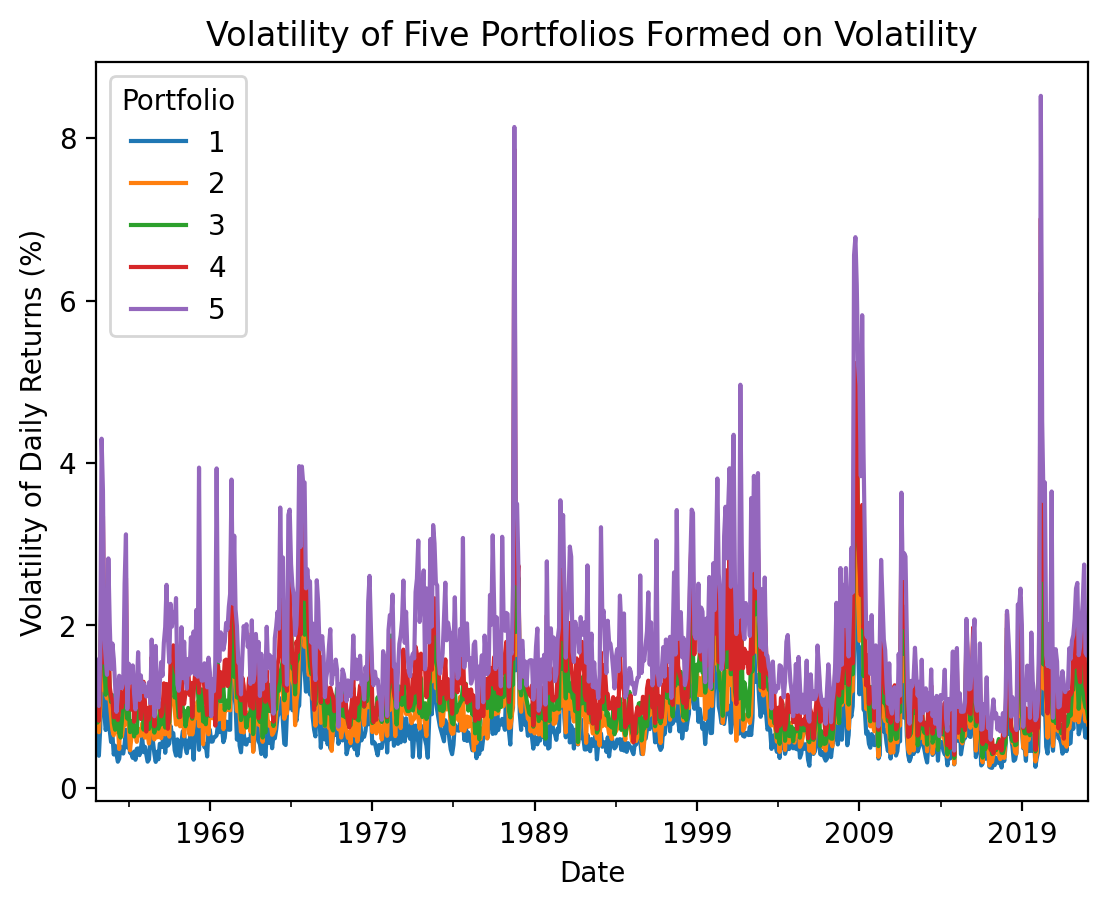

In [24]:
(
    dj
    .stack()
    .groupby(['Date', 'Portfolio'])
    ['Returns']
    .mean()
    .reset_index('Portfolio')
    .groupby([pd.Grouper(freq='M'), 'Portfolio'])
    .std()
    .rename(columns={'Returns': 'Volatility'})
    .reset_index('Portfolio')
    .dropna() # drop missing port.
    .assign(Portfolio = lambda x: 1 + x['Portfolio'].astype(int)) # w/o missing portf., can convert to integer
    .set_index('Portfolio', append=True)
    .unstack()
    ['Volatility']
    .mul(100)
    .plot()
)

plt.ylabel('Volatility of Daily Returns (%)')
plt.title('Volatility of Five Portfolios Formed on Volatility')
plt.show()

### Calculate the *mean* monthly correlation between the Dow Jones stocks

Drop duplicate correlations and self correlations (i.e., correlation between AAPL and AAPL), which are 1, by definition.

In [25]:
def mu_rho(x):
    rhos = x.corr()
    tril = np.tril(rhos)
    return np.nanmean(rhos.values[(tril != 0.) & (tril != 1.)])

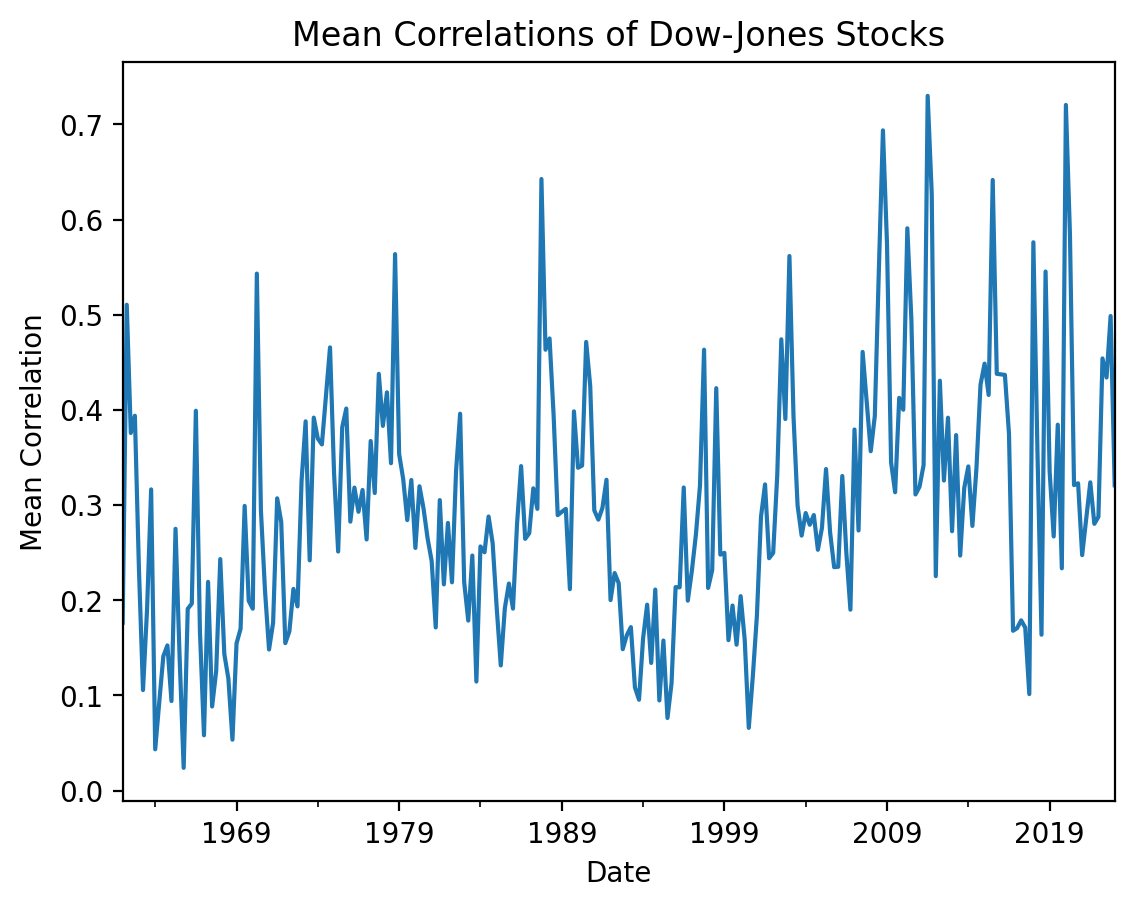

In [26]:
(
    dj
    ['Returns']
    .groupby(pd.Grouper(freq='Q'))
    .apply(mu_rho)
    .plot()
)

plt.ylabel('Mean Correlation')
plt.title('Mean Correlations of Dow-Jones Stocks')
plt.show()

### Is market volatility higher during wars?

Here is some guidance:

1. Download the daily factor data from Ken French's website
1. Calculate daily market returns by summing the market risk premium and risk-free rates (`Mkt-RF` and `RF`, respectively)
1. Calculate the volatility (standard deviation) of daily returns *every month* by combining `pd.Grouper()` and `.groupby()`)
1. Multiply by $\sqrt{252}$ to annualize these volatilities of daily returns
1. Plot these annualized volatilities

Is market volatility higher during wars?
Consider the following dates:

1. WWII: December 1941 to September 1945
1. Korean War: 1950 to 1953
1. Viet Nam War: 1959 to 1975
1. Gulf War: 1990 to 1991
1. War in Afghanistan: 2001 to 2021

In [27]:
import pandas_datareader as pdr

In [28]:
pdr.famafrench.get_available_datasets()[:5]

['F-F_Research_Data_Factors',
 'F-F_Research_Data_Factors_weekly',
 'F-F_Research_Data_Factors_daily',
 'F-F_Research_Data_5_Factors_2x3',
 'F-F_Research_Data_5_Factors_2x3_daily']

In [29]:
ff_all = pdr.DataReader(
    name='F-F_Research_Data_Factors_daily',
    data_source='famafrench',
    start='1900',
    session=session
)

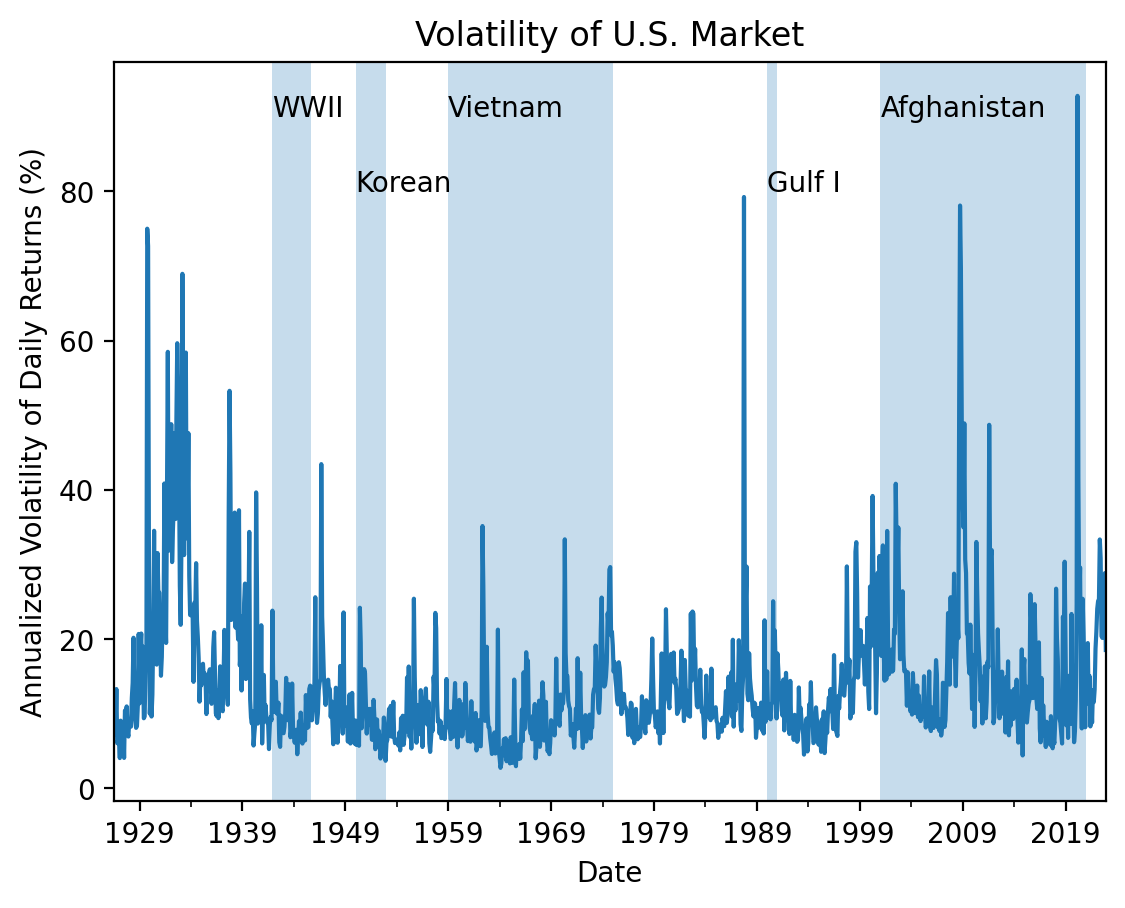

In [30]:
(
    ff_all[0]
    .assign(Mkt = lambda x: x['Mkt-RF'] + x['RF'])
    ['Mkt']
    .groupby(pd.Grouper(freq='M'))
    .std()
    .mul(np.sqrt(252))
    .plot()
)

# adds vertical bands for U.S. wars
plt.axvspan('1941-12', '1945-09', alpha=0.25)
plt.annotate('WWII', ('1941-12', 90))
plt.axvspan('1950', '1953', alpha=0.25)
plt.annotate('Korean', ('1950', 80))
plt.axvspan('1959', '1975', alpha=0.25)
plt.annotate('Vietnam', ('1959', 90))
plt.axvspan('1990', '1991', alpha=0.25)
plt.annotate('Gulf I', ('1990', 80))
plt.axvspan('2001', '2021', alpha=0.25)
plt.annotate('Afghanistan', ('2001', 90))

plt.ylabel('Annualized Volatility of Daily Returns (%)')
plt.title('Volatility of U.S. Market')
plt.show()